## Predicting Water Pump Functionality in Tanzania

# Introduction

Over 80% of the Tanzanian population lack access to safe water (1).Over the years, millions have been invested into water pump sytems however due to a lack of effective maintenance and repair, potentially fuctional waterpoints lie idle. In Tanzania, an estimated 44% of all water access points are defective. These broken water points could supply millions of people with water, but they remain unused (2). To solve the current water crisis, it is important to understand which water points are functional, in need of repair or non-functional. It is however, highly cost ineffective and impractical to manually inspect the functionality of each Water Pump (3). Predictive Maintenace provides an innovative and cost efficient way to mitigate the challenge of broken water points. Predictive maintenance helps keep equipment running smoothly by constantly checking its condition in real time. This approach builds on traditional monitoring methods to improve performance and extend the life of machines.By using sensors to collect data and advanced tools like machine learning (ML) to analyze it, predictive maintenance can detect problems as they happen and even predict future issues. This helps prevent breakdowns, reduce risks, and keep operations running efficiently (4).

# Project Overview

This machine learning project seeks to predict the functionality status of water pumps across Tanzania by evaluating a variety of features including but not limited to location, water quality, management structure, and technical specifications. By identifying which water pumps are functional, in need of repair or non-functional, our project addresses a critical infrastructure challenge.

Sources: 
1. Water.org (https://water.org/our-impact/where-we-work/tanzania/)
2. WasserStiftung (https://water.org/our-impact/where-we-work/tanzania/)
3. Chowdavarapu,I.K., Manikandan, V.D. (2016). Data Mining the Water Pumps: Determining the functionality of Water 
Pumps in Tanzania using SAS® Enterprise Miner 
4. IBM (https://www.ibm.com/think/topics/predictive-maintenance)

In [2]:
# Imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [3]:
# Load training dataset labels and values 

# Load labels
labels_url = "https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/raw/Training_Set_Labels.csv" 
df_labels = pd.read_csv("https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/raw/Training_Set_Labels.csv")

# Load values
values_url = "https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/raw/Training_Set_Values.csv" 
df_values = pd.read_csv("https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/raw/Training_Set_Values.csv")


In [4]:
# Explore data in Training Labels 

df_labels.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [5]:
# Explore data in Training Values

df_values.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [6]:
# Merge Labels and Values using .merge (Left Join on id)

df_train = df_train = df_values.merge(df_labels, on="id", how="left")
df_train.to_csv("C:/Users/ReDI_NRW_800/Documents/Hydrologic/data/Merged_Tain_Set.csv", index=False) 

# Preview the dataset 

df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
# Merge Labels and Values using pd.concat

df_train_concat = pd.concat([df_values, df_labels], axis=1)

# Preview the dataset

df_train_concat.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,9944,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,19816,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,54551,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,53934,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,46144,functional


In [8]:
# Determining if .merge and .concat will provide the same dataset given that they merge differently 

is_same = df_train.equals(df_train_concat)
print("Are the two DataFrames identical?", is_same)

Are the two DataFrames identical? False


In [9]:
# Explore Columns in both datasets to determine if there is a difference in columns 

print(df_train.columns)
print(df_train_concat.columns)

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')
Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'sch

In [10]:
# Explore the shape of both datasets to determine if there is a difference in rows and columns 

print("Shape of df_train:", df_train.shape)
print("Shape of df_train_concat:", df_train_concat.shape)

Shape of df_train: (59400, 41)
Shape of df_train_concat: (59400, 42)


Result: Initial exploration presents duplicated 'id' column when using .concat

# Further Exploration using df_train

In [11]:
# Overview of column data types and missing values

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [12]:
# First 5 rows

df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [13]:
# Last 5 rows

df_train.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [14]:
#Inspect Column contents. Identify number of unique values in each column

unique_values = df_train.nunique()

unique_values

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1896
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37399
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           11
scheme_name               2695
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [15]:
# Duplicate Rows

num_duplicates = df_train.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {num_duplicates}")


Number of Duplicate Rows: 0


In [16]:
# Counting Missing Values in each column

df_train.isnull().sum().sort_values(ascending=False)

scheme_name              28810
scheme_management         3878
installer                 3655
funder                    3637
public_meeting            3334
permit                    3056
subvillage                 371
wpt_name                     2
water_quality                0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
quantity                     0
quality_group                0
extraction_type              0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
extraction_type_group        0
id                           0
construction_year            0
amount_tsh                   0
recorded_by                  0
population                   0
ward                         0
lga                          0
district_code                0
region_c

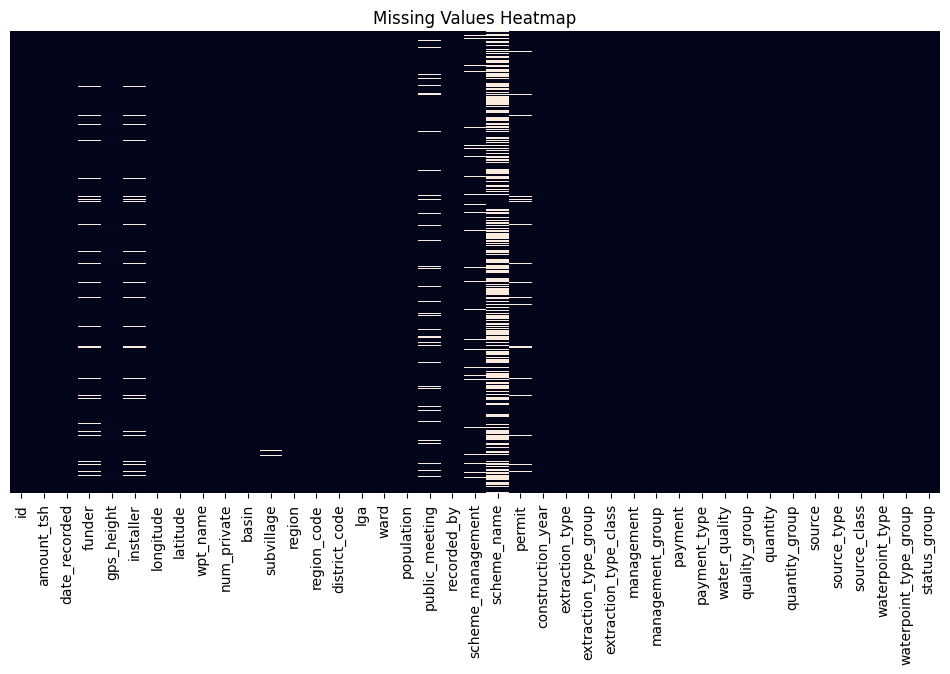

In [17]:
# Missing values heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cmap="rocket", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [18]:
# Statistical summary for numerical columns

df_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [19]:
# Exploring Numerical columns

# Select only numerical columns
numerical_columns = df_train.select_dtypes(include=['number'])

# Display the first few rows of numerical data
numerical_columns

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0


In [20]:
#Inspect Column contents:
#Unique values in column - 'amount_tsh' (Total static head (amount water available to waterpoint))

df_train['amount_tsh'].unique()

array([6.00e+03, 0.00e+00, 2.50e+01, 2.00e+01, 2.00e+02, 5.00e+02,
       5.00e+01, 4.00e+03, 1.50e+03, 6.00e+00, 2.50e+02, 1.00e+01,
       1.00e+03, 1.00e+02, 3.00e+01, 2.00e+03, 4.00e+02, 1.20e+03,
       4.00e+01, 3.00e+02, 2.50e+04, 7.50e+02, 5.00e+03, 6.00e+02,
       7.20e+03, 2.40e+03, 5.00e+00, 3.60e+03, 4.50e+02, 4.00e+04,
       1.20e+04, 3.00e+03, 7.00e+00, 2.00e+04, 2.80e+03, 2.20e+03,
       7.00e+01, 5.50e+03, 1.00e+04, 2.50e+03, 6.50e+03, 5.50e+02,
       3.30e+01, 8.00e+03, 4.70e+03, 7.00e+03, 1.40e+04, 1.30e+03,
       1.00e+05, 7.00e+02, 1.00e+00, 6.00e+01, 3.50e+02, 2.00e-01,
       3.50e+01, 3.06e+02, 8.50e+03, 1.17e+05, 3.50e+03, 5.20e+02,
       1.50e+01, 6.30e+03, 9.00e+03, 1.50e+02, 1.20e+05, 1.38e+05,
       3.50e+05, 4.50e+03, 1.30e+04, 4.50e+04, 2.00e+00, 1.50e+04,
       1.10e+04, 5.00e+04, 7.50e+03, 1.63e+04, 8.00e+02, 1.60e+04,
       3.00e+04, 5.30e+01, 5.40e+03, 7.00e+04, 2.50e+05, 2.00e+05,
       2.60e+04, 1.80e+04, 2.60e+01, 5.90e+02, 9.00e+02, 9.00e

In [21]:
# For readable data

amount_tsh_unique = [f"{value:,.2f}" for value in df_train['amount_tsh'].unique()]

print(amount_tsh_unique)

['6,000.00', '0.00', '25.00', '20.00', '200.00', '500.00', '50.00', '4,000.00', '1,500.00', '6.00', '250.00', '10.00', '1,000.00', '100.00', '30.00', '2,000.00', '400.00', '1,200.00', '40.00', '300.00', '25,000.00', '750.00', '5,000.00', '600.00', '7,200.00', '2,400.00', '5.00', '3,600.00', '450.00', '40,000.00', '12,000.00', '3,000.00', '7.00', '20,000.00', '2,800.00', '2,200.00', '70.00', '5,500.00', '10,000.00', '2,500.00', '6,500.00', '550.00', '33.00', '8,000.00', '4,700.00', '7,000.00', '14,000.00', '1,300.00', '100,000.00', '700.00', '1.00', '60.00', '350.00', '0.20', '35.00', '306.00', '8,500.00', '117,000.00', '3,500.00', '520.00', '15.00', '6,300.00', '9,000.00', '150.00', '120,000.00', '138,000.00', '350,000.00', '4,500.00', '13,000.00', '45,000.00', '2.00', '15,000.00', '11,000.00', '50,000.00', '7,500.00', '16,300.00', '800.00', '16,000.00', '30,000.00', '53.00', '5,400.00', '70,000.00', '250,000.00', '200,000.00', '26,000.00', '18,000.00', '26.00', '590.00', '900.00', '9.

In [22]:
# Distribution of column 'amount_tsh'

amt_tsh_distribution = df_train['amount_tsh'].value_counts()

amt_tsh_distribution.head(20)

amount_tsh
0.0       41639
500.0      3102
50.0       2472
1000.0     1488
20.0       1463
200.0      1220
100.0       816
10.0        806
30.0        743
2000.0      704
250.0       569
300.0       557
5000.0      450
5.0         376
25.0        356
3000.0      334
1200.0      267
1500.0      197
6.0         190
600.0       176
Name: count, dtype: int64

In [23]:
#Inspect Column contents:
#Unique values in column - 'gps_height' (Altitude of the well)

gps_height_unique = df_train['gps_height'].unique()

gps_height_unique

array([1390, 1399,  686, ...,  -90, 2091, 2366], dtype=int64)

In [24]:
# Distribution of column 'gps_height'

gps_height_distribution = df_train['gps_height'].value_counts()

gps_height_distribution.head(20)

gps_height
 0       20438
-15         60
-16         55
-13         55
 1290       52
-20         52
-14         51
 303        51
-18         49
-19         47
 1295       46
 1269       46
 1304       45
-23         45
 280        44
 1538       44
-8          44
 1286       44
-17         44
 320        43
Name: count, dtype: int64

In [25]:
#Inspect Column contents:
#Unique values in column - 'longitude' (GPS coordinate)

longitude_unique = df_train['longitude'].unique()

longitude_unique

array([34.93809275, 34.6987661 , 37.46066446, ..., 34.01708706,
       35.86131531, 38.10404822])

In [26]:
# Distribution of column 'longitude'

longitude_distribution = df_train['longitude'].value_counts()

longitude_distribution.head(20)

longitude
0.000000     1812
37.375717       2
38.340501       2
39.086183       2
33.005032       2
39.091785       2
32.987511       2
37.236326       2
39.086287       2
39.085965       2
39.088875       2
39.119210       2
39.092062       2
32.987670       2
32.984790       2
38.180538       2
37.281357       2
37.542785       2
39.101244       2
32.977191       2
Name: count, dtype: int64

In [27]:
#Inspect Column contents:
#Unique values in column - 'latitude' (GPS coordinate)

latitude_unique = df_train['latitude'].unique()

latitude_unique

array([-9.85632177, -2.14746569, -3.82132853, ..., -8.75043433,
       -6.37857327, -6.74746425])

In [28]:
# Distribution of column 'latitude'

latitude_distribution = df_train['latitude'].value_counts()

latitude_distribution.head(20)

latitude
-2.000000e-08    1812
-6.985842e+00       2
-6.980220e+00       2
-2.476680e+00       2
-6.978263e+00       2
-7.078081e+00       2
-2.465246e+00       2
-2.494353e+00       2
-7.177203e+00       2
-2.515321e+00       2
-6.994704e+00       2
-6.976270e+00       2
-6.983115e+00       2
-2.485227e+00       2
-7.056372e+00       2
-2.494546e+00       2
-2.496459e+00       2
-2.467137e+00       2
-7.065373e+00       2
-6.990147e+00       2
Name: count, dtype: int64

In [29]:
#Inspect Column contents:
#Unique values in column - 'population' (Population around the well)

population_unique = df_train['population'].unique()

population_unique

array([109, 280, 250, ..., 845, 976, 788], dtype=int64)

In [30]:
#Inspect Column contents:
#Unique values in column - 'population' (Population around the well)

population_unique = df_train['population'].unique()

population_unique

array([109, 280, 250, ..., 845, 976, 788], dtype=int64)

In [31]:
# Distribution of column 'population'

population_distribution = df_train['population'].value_counts()

population_distribution.head(20)

population
0      21381
1       7025
200     1940
150     1892
250     1681
300     1476
100     1146
50      1139
500     1009
350      986
120      916
400      775
60       706
30       626
40       552
80       533
450      499
20       462
600      438
230      388
Name: count, dtype: int64

In [32]:
#Inspect Column contents:
#Unique values in column - 'construction_year' (Year the waterpoint was constructed)

construction_year_unique = df_train['construction_year'].unique()

print(construction_year_unique)

[1999 2010 2009 1986    0 2011 1987 1991 1978 1992 2008 1974 2000 2002
 2004 1972 2003 1980 2007 1973 1985 1970 1995 2006 1962 2005 1997 2012
 1996 1977 1983 1984 1990 1982 1976 1988 1989 1975 1960 1961 1998 1963
 1971 1994 1968 1993 2001 1979 1967 2013 1969 1981 1964 1966 1965]


In [33]:
# Distribution of column 'construction_year'

construction_year_distribution = df_train['construction_year'].value_counts()

construction_year_distribution.head(20)

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
Name: count, dtype: int64

## Visualisation of Distribution in Numerical Categories

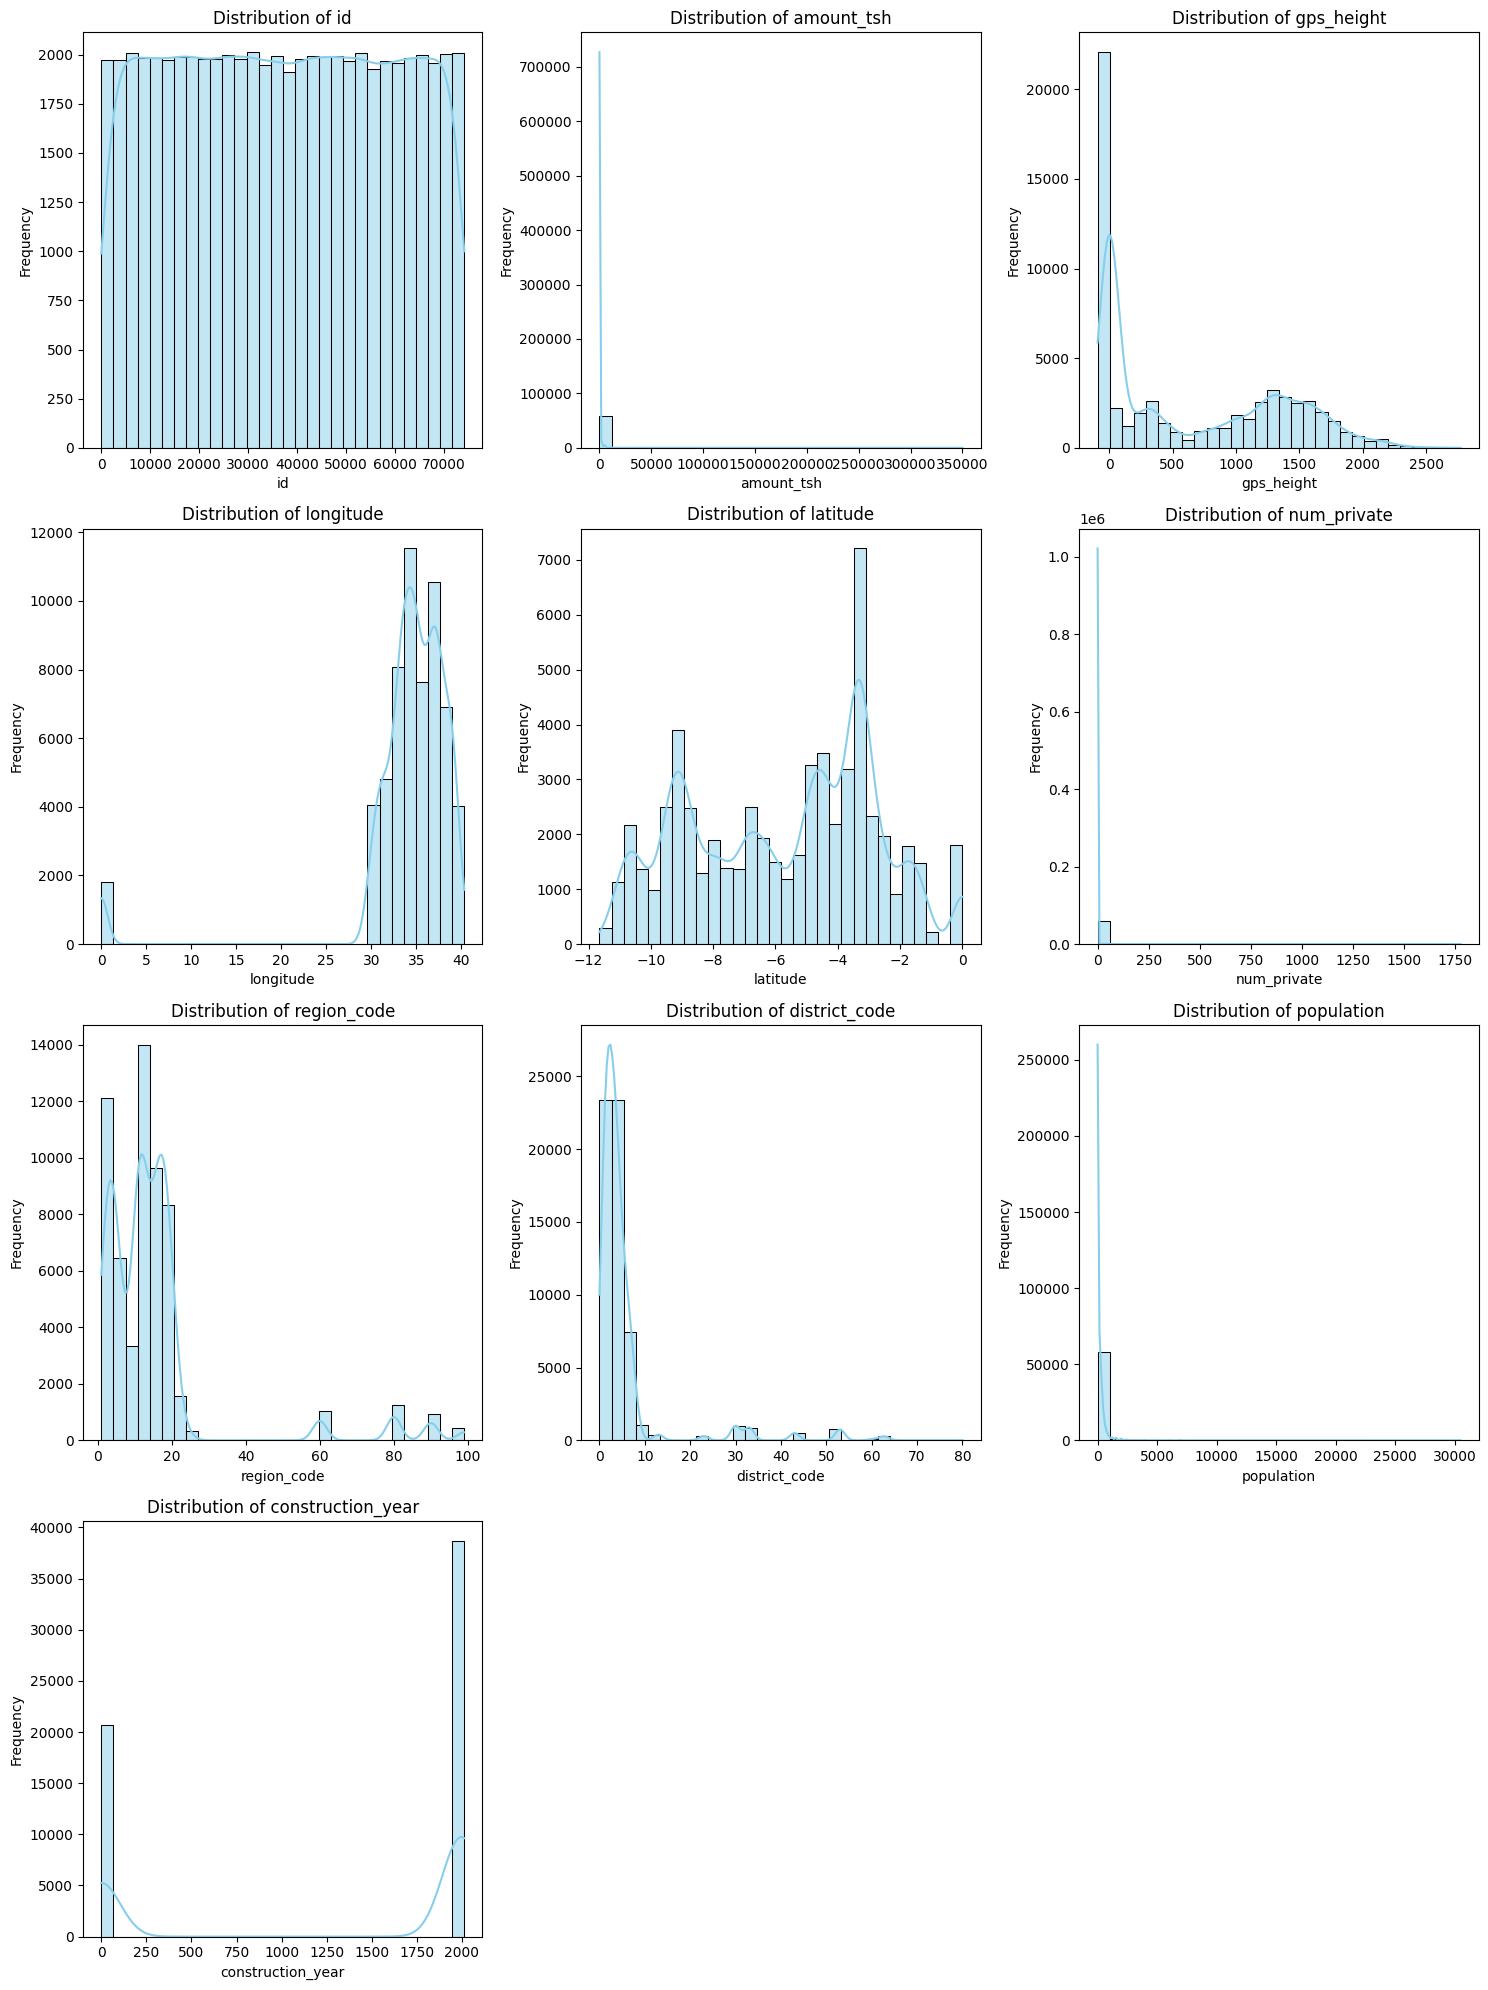

In [69]:
n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

plt.figure(figsize=(15, 5 * n_rows))  

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  
    sns.histplot(df_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

# Plot interpretations and observations

'id': The distribution appears uniform, with all bars roughly the same height.There’s no skew, peaks, or clusters — just a flat, even spread. This was to be expected given that 'id' is a unique identifier and not tied to any meaningful patterns in the data.

'amount_tsh': The distribution is heavily right-skewed. The majority of values are at or near 0. This is shown by a huge spike at 0 or close to 0. A long tail extends all the way up to 350,000, though these large values are rare. Given that Total static head __"total static head" (TSH)__ in water engineering terms, usually refers to:
- The __vertical distance__ (in meters) from the water source (like a well or borehole) to the __discharge point__ (where water comes out), this skew is not alarming. 

'gps_height': The distribution is heavily right-skewed, with most values concentrated below 2000 meters and a spike at 0.Excluding the spike at 0, the most common values appear to lie between 1000 and 1700 meters. After 2000 meters, the frequency of values drops off significantly. 

'longitude': The majority of values fall between 30 and 40 degrees. This is consistent with countries in East Africa such as Tanzania, Kenya and Uganda. Given that our data is focused on Tanzania, this is to be expected. We find a slight spike in coordinates at longitude 0. This is unrealistic as such coordinates would fall within the Atlantic. (It will be important to look at other data such as region and status_group to determine the value of this column) The data outside the 30–40 range (except 0) is minimal or non-existent. This further suggests the dataset is geographically focused. 

'latitude': The values range from approximately -12 to 0 aligns well with Tanzania, which spans from around -12° to -1° latitude.There's a notable spike at approximately -4, indicating a dense cluster of data points in that latitude.(Further analysis of the data to understand if this correlates to a major population center or a region where data collection was heavily focused) Although there was no clear spike at a latitude of 0 degrees, with a frequency of slightly under 2000 records, further analysis will be needed. 

'population': the data in this column is extremely right-skewed. Most values of the population column are concentrated at the very low end (close to 0). (This column is meant to depict the population around the well. It would be important to understand if this is the same as the population using the well)

'construction_year': The graph has two distinct peaks with a large spike near 0. This likely represents missing or unknown data. The second peak represents the years between 1980-2010. A large portion of data falls in the invalid or missing category. (A possible way to handle these missing years is to consider the date available for construction_year for pumps in the region and find an average)




## Visualisation showing distribution of numerical columns by functionality

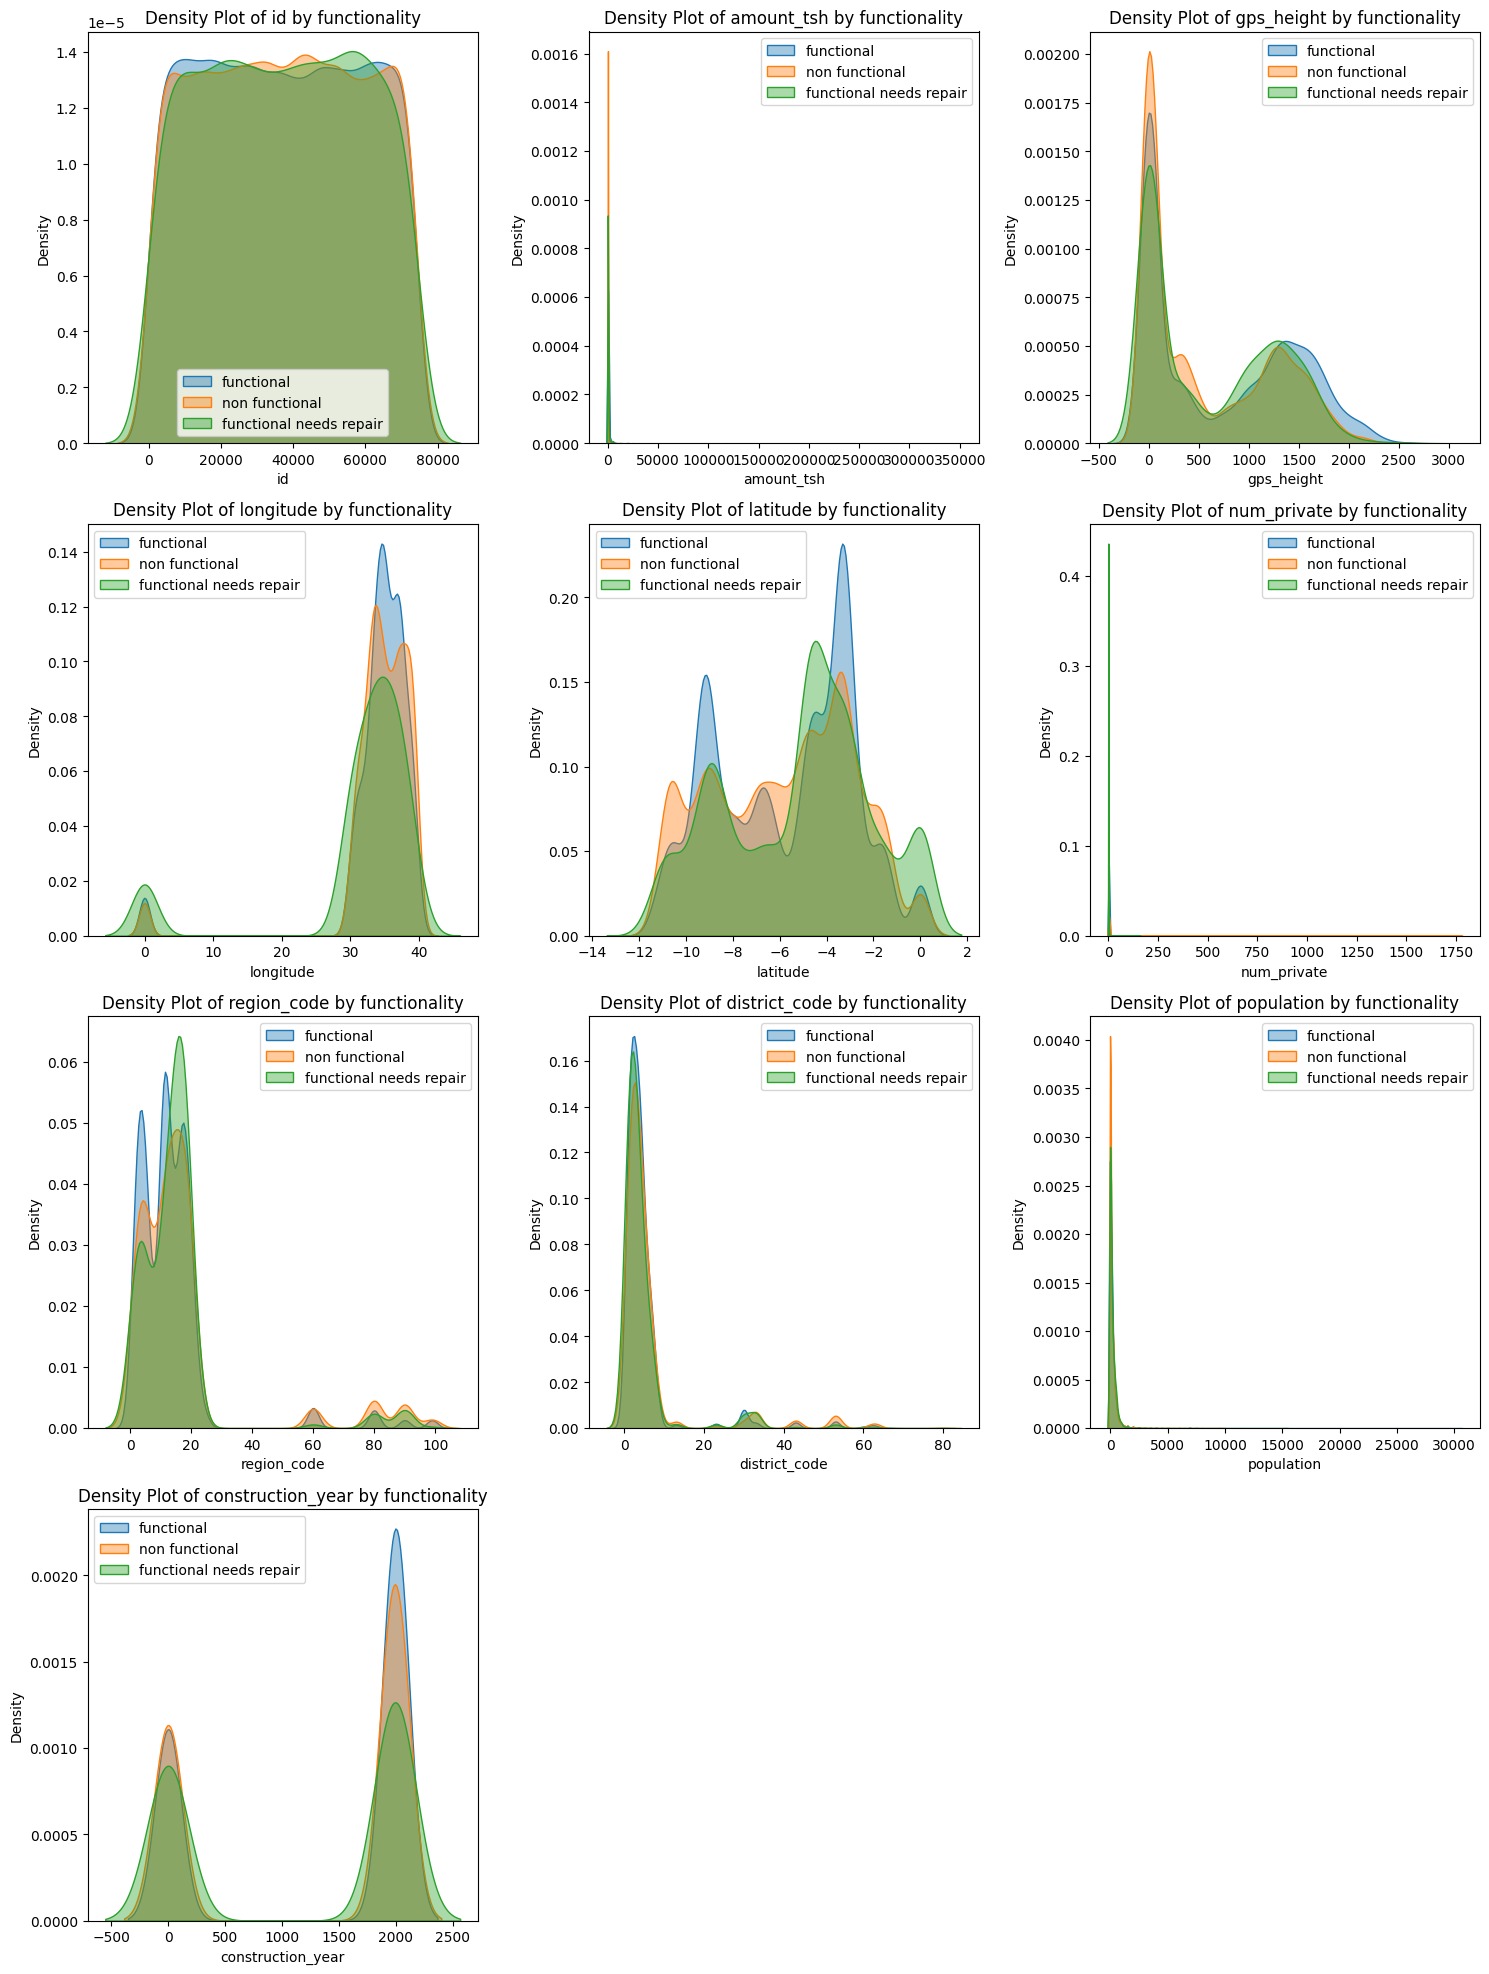

In [35]:
n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))


plt.figure(figsize=(15, 5 * n_rows))  

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  
    
    # Plot the density plots for each group in 'status_group'
    for group in df_train['status_group'].unique():
        subset = df_train[df_train['status_group'] == group]
        sns.kdeplot(subset[col], label=group, fill=True, alpha=0.4)
    
    # Title and legend
    plt.title(f'Density Plot of {col} by functionality')
    plt.legend()
    
plt.tight_layout()  
plt.show()

## Visualisation to show outliers

In [36]:
# Set the desired number of columns per row (you can adjust this number)
n_cols = 3

# Calculate the number of rows required to fit all numeric columns
n_rows = int(np.ceil(len(numerical_columns) / n_cols))  # Round up to ensure all columns are displayed

# Display the number of rows and columns needed
print(f"Number of rows: {n_rows}, Number of columns: {n_cols}")

Number of rows: 4, Number of columns: 3


<Figure size 1500x1000 with 0 Axes>

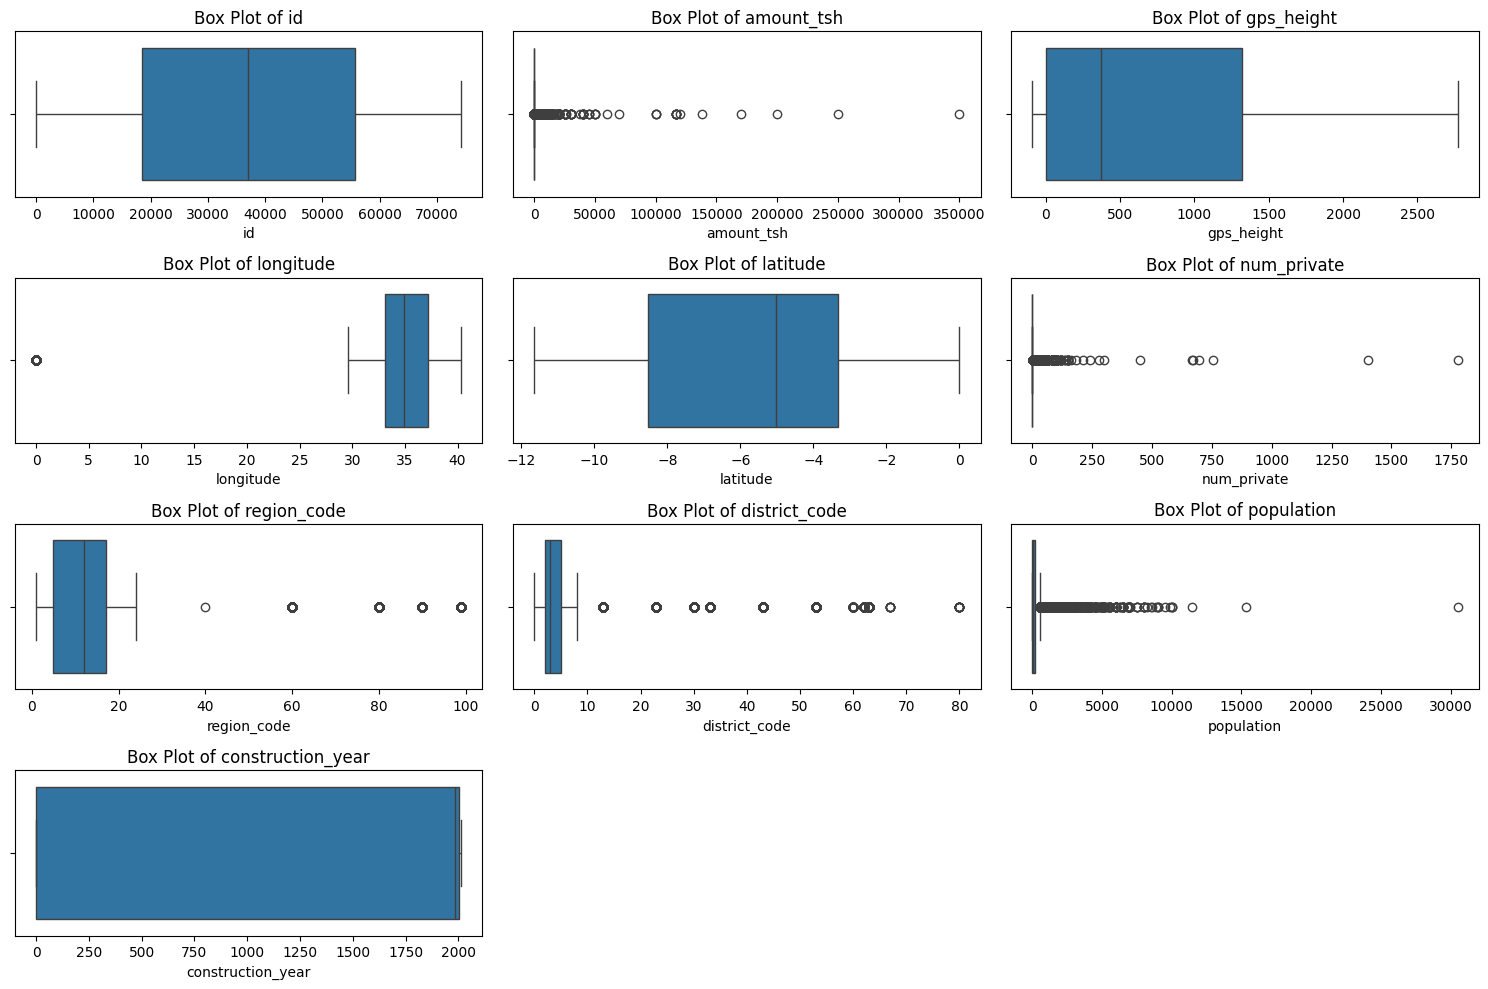

In [37]:
# Boxplots to detect outliers
plt.figure(figsize=(15, 10))


plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)  
    sns.boxplot(x=df_train[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


Showing box plots after removing outliers 

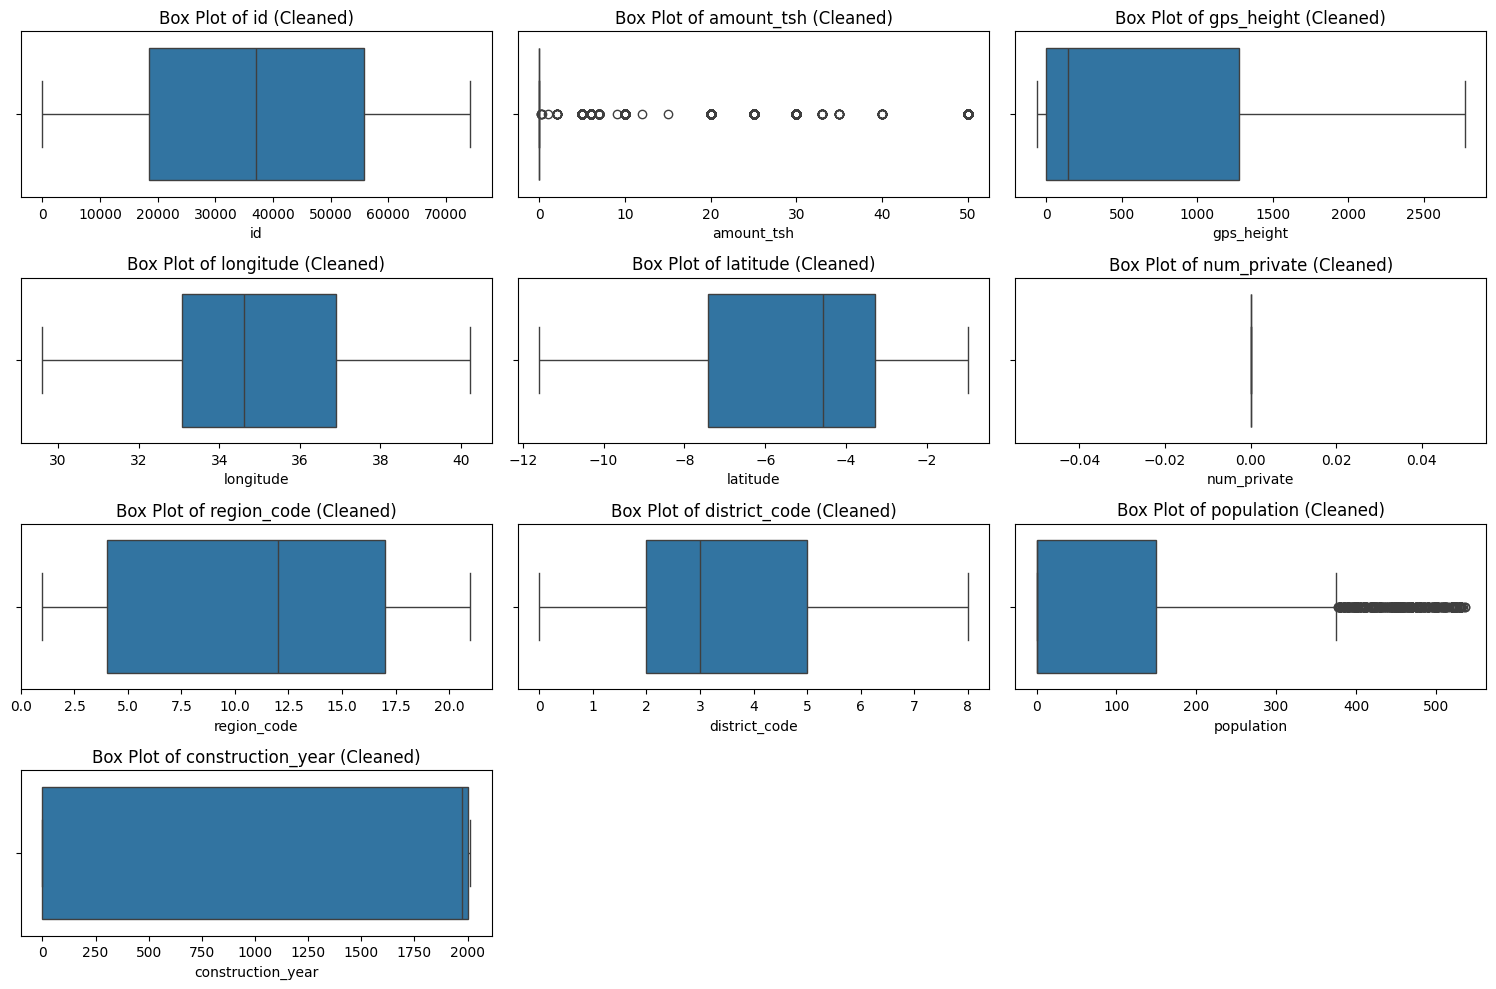

In [38]:
# Calculate Q1  and Q3  for each numeric column
Q1 = df_train[numerical_columns].quantile(0.25)
Q3 = df_train[numerical_columns].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering rows within the bounds
df_train_cleaned = df_train[~((df_train[numerical_columns] < lower_bound) | (df_train[numerical_columns] > upper_bound)).any(axis=1)]


plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)  
    sns.boxplot(x=df_train_cleaned[column])
    plt.title(f'Box Plot of {column} (Cleaned)')

plt.tight_layout()  
plt.show()

In [39]:
# Statistical summary for categorical columns

df_train.describe(include='object')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55763,55745,59398,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1896,2145,37399,9,19287,21,125,2092,2,...,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


In [40]:
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns

categorical_columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

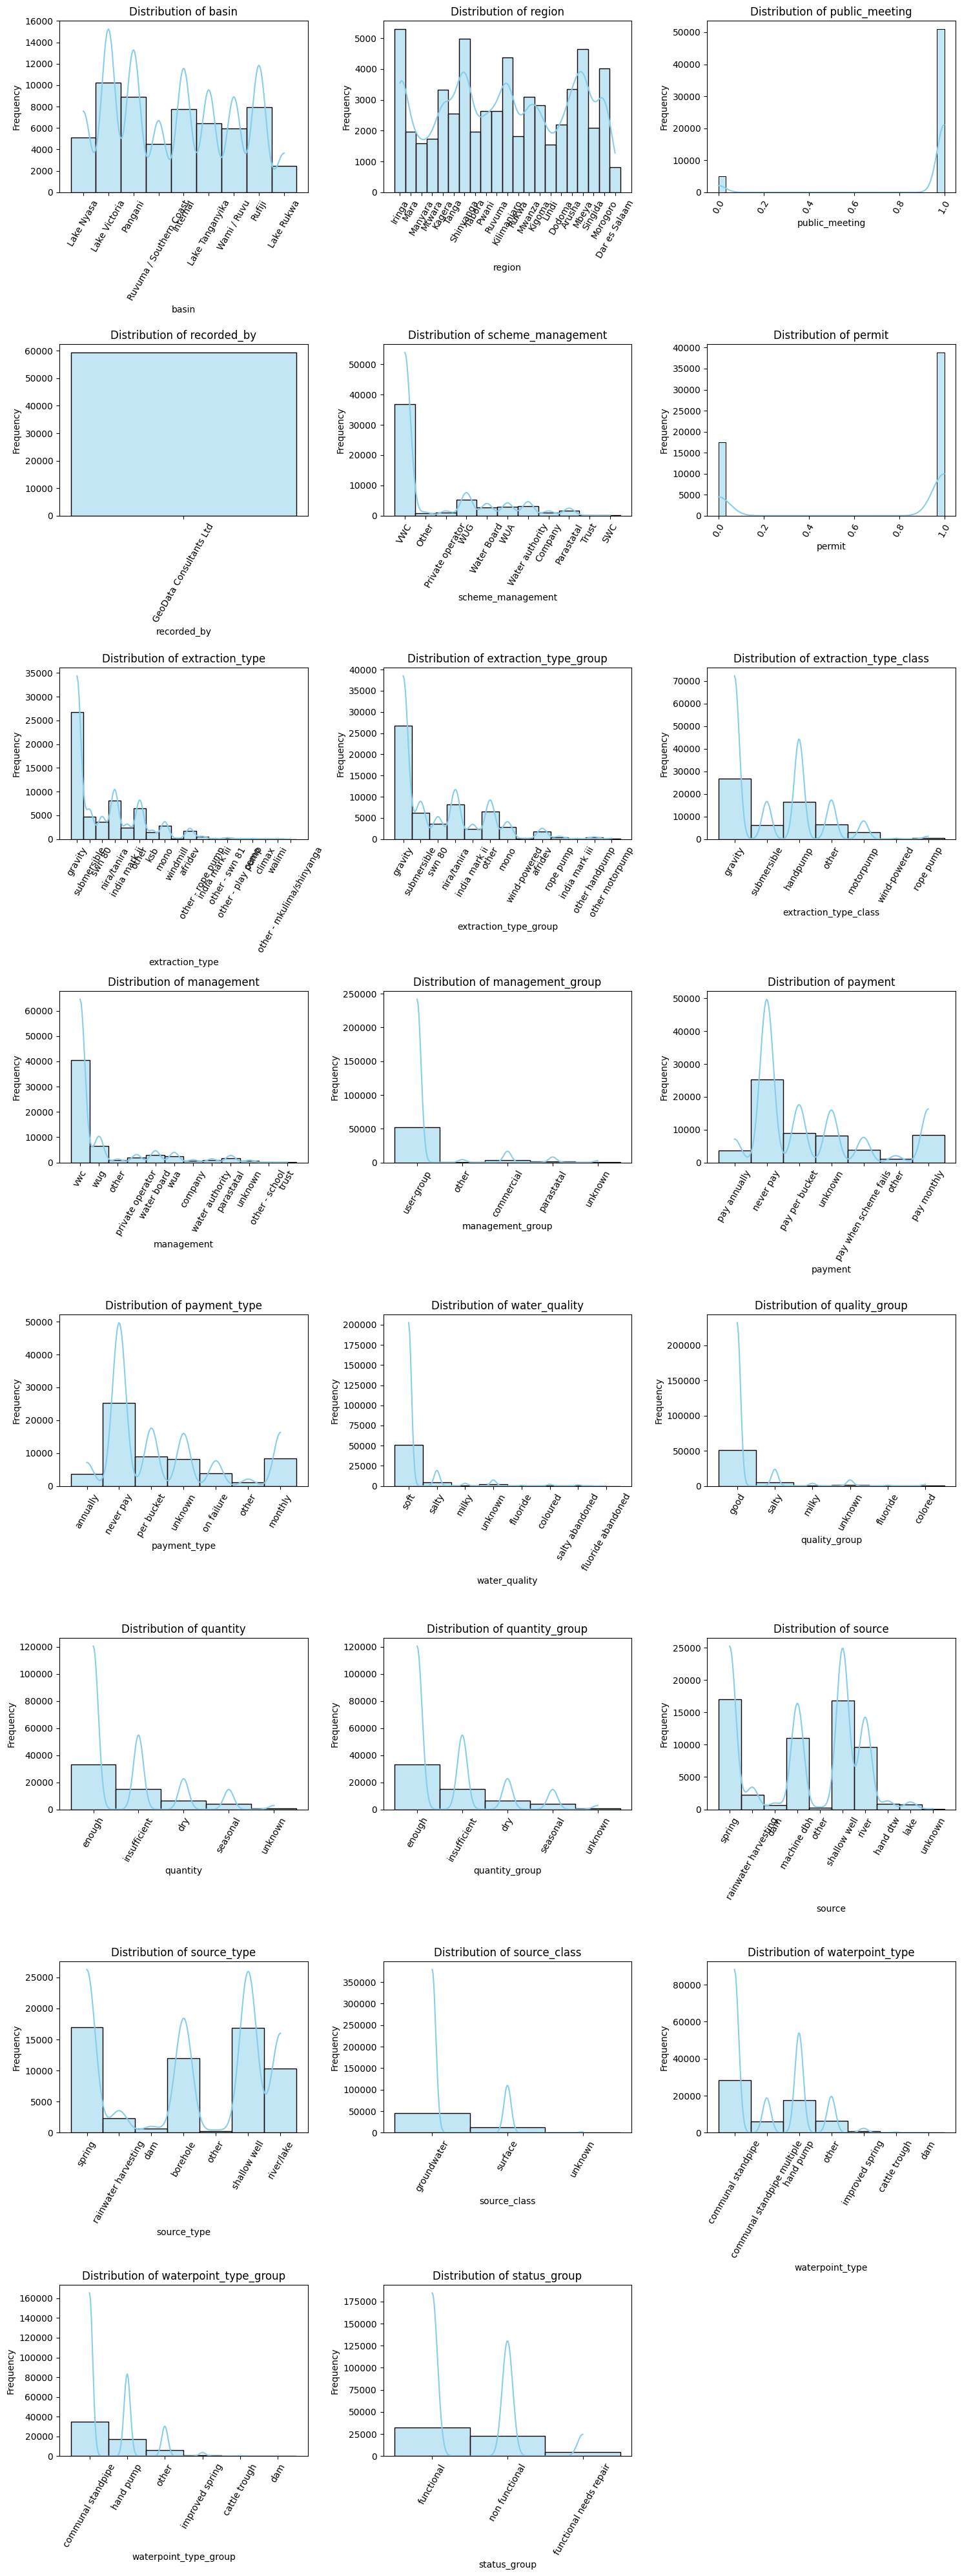

In [41]:
low_carn_categorical = [col for col in categorical_columns if df_train[col].nunique() < 50]

n_cols = 3

n_rows = int(np.ceil(len(low_carn_categorical) / n_cols))

# Create subplots with multiple rows and columns
plt.figure(figsize=(15, 5 * n_rows))  

for i, col in enumerate(low_carn_categorical, 1):
    plt.subplot(n_rows, n_cols, i)  
    sns.histplot(df_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=60)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

In [42]:
#Inspect Column contents:
#Unique values in column - 'date_recorded' (The date the row was entered)

date_recorded_unique = df_train['date_recorded'].unique()

print(date_recorded_unique)

['2011-03-14' '2013-03-06' '2013-02-25' '2013-01-28' '2011-07-13'
 '2011-03-13' '2012-10-01' '2012-10-09' '2012-11-03' '2011-08-03'
 '2011-02-20' '2013-02-18' '2012-10-14' '2013-03-15' '2012-10-20'
 '2011-08-04' '2011-07-04' '2011-09-04' '2011-07-22' '2011-02-22'
 '2011-02-27' '2013-02-10' '2011-10-04' '2013-11-03' '2013-01-21'
 '2013-01-16' '2011-07-11' '2013-03-05' '2013-03-16' '2011-03-23'
 '2011-03-16' '2013-03-19' '2011-03-11' '2011-02-23' '2013-03-28'
 '2011-07-16' '2011-03-27' '2013-02-11' '2013-10-03' '2011-03-12'
 '2011-07-07' '2013-01-15' '2013-03-18' '2012-10-22' '2013-02-05'
 '2011-07-27' '2011-04-04' '2013-02-21' '2011-08-18' '2011-07-31'
 '2011-08-01' '2011-07-14' '2013-02-22' '2013-07-03' '2013-08-03'
 '2013-01-22' '2011-03-22' '2013-05-03' '2013-01-19' '2013-02-09'
 '2011-01-04' '2013-02-04' '2011-03-05' '2011-03-31' '2013-02-27'
 '2011-08-07' '2011-03-30' '2012-10-23' '2011-03-02' '2011-03-04'
 '2013-03-14' '2012-10-18' '2011-08-08' '2011-09-05' '2011-04-11'
 '2013-01-

In [43]:
# Distribution of column 'date_recorded'

date_recorded_distribution = df_train['date_recorded'].value_counts()

date_recorded_distribution.head(20)

date_recorded
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
2011-03-18    497
2011-03-19    466
2013-02-04    464
2013-01-29    459
2011-03-04    458
2013-02-14    444
2013-01-24    435
2011-03-05    434
2013-02-15    429
2013-03-15    428
2011-03-11    426
2013-01-30    421
2013-02-16    418
2011-03-23    417
2011-03-09    416
Name: count, dtype: int64

In [44]:
#Inspect Column contents:
#Unique values in column - 'funder' (Who funded the well)

funder_unique = df_train['funder'].unique()

funder_unique

array(['Roman', 'Grumeti', 'Lottery Club', ..., 'Dina', 'Brown', 'Samlo'],
      dtype=object)

In [45]:
# Distribution of column 'funder'

funder_distribution = df_train['funder'].value_counts()

funder_distribution.head(10) # top 10 funders

funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: count, dtype: int64

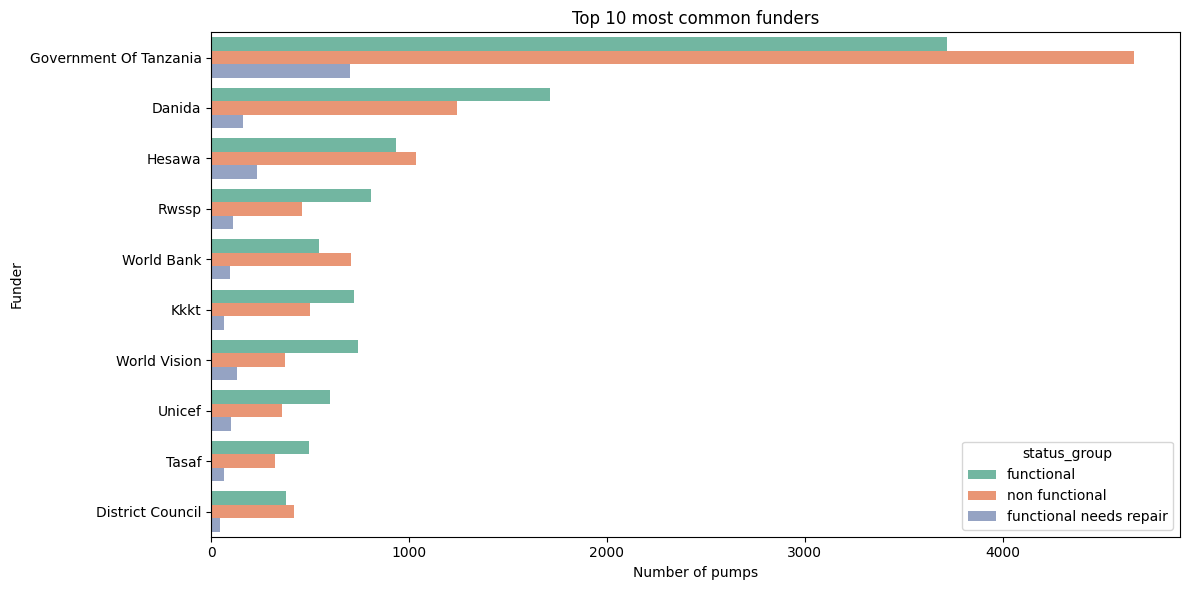

In [46]:
# graph showing pump count and status for the top 10 funders 

plt.figure(figsize=(12, 6))

sns.countplot(y="funder", data=df_train, palette="Set2", order=df_train["funder"].value_counts().head(10).index, hue="status_group")
plt.title("Top 10 most common funders")
plt.xlabel("Number of pumps")
plt.ylabel("Funder")
plt.tight_layout()
plt.show()

*NB: input of 0 in 'funder' - this will not be flagged as a missing input this will be addressed in the data cleaning.

In [47]:
#Inspect Column contents:
#Unique values in column - 'installer' (Organization that installed the well)

installer_unique = df_train['installer'].unique()

print(installer_unique)

['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']


In [48]:
# Distribution of column 'installer'

installer_distribution = df_train['installer'].value_counts()

installer_distribution.head(10)

installer
DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: count, dtype: int64

*NB: input of 0 in 'installer' - this will not be flagged as a missing input this will be addressed in the data cleaning.

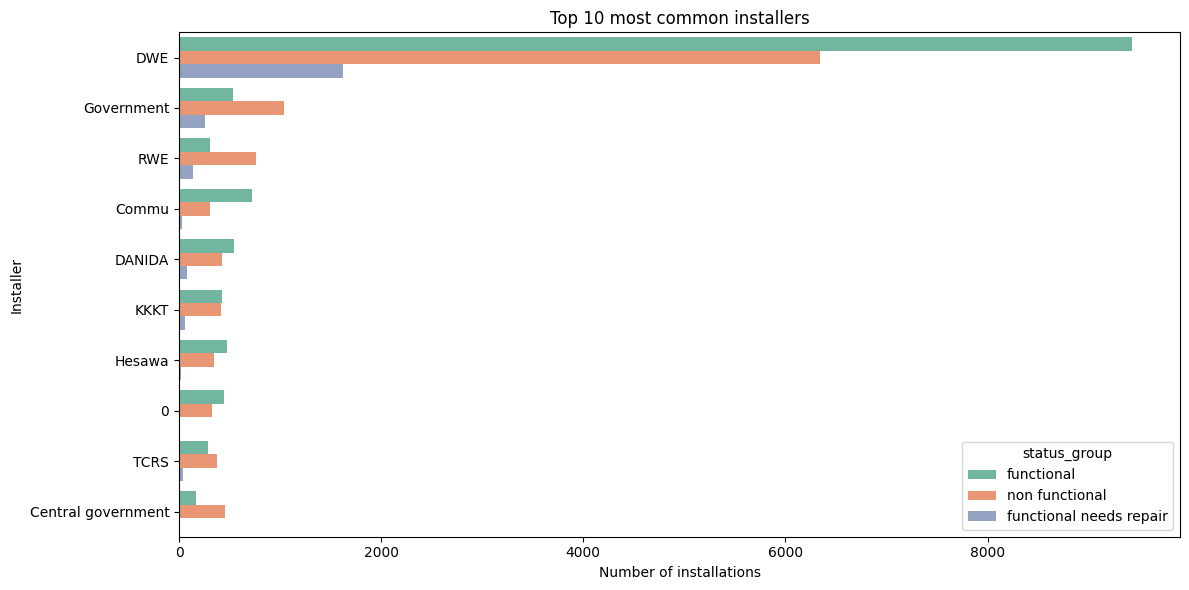

In [70]:
# graph showing pump count and status for top 10 installers 

plt.figure(figsize=(12, 6))

sns.countplot(y="installer", data=df_train, palette="Set2", order=df_train["installer"].value_counts().head(10).index, hue="status_group")
plt.title("Top 10 most common installers")
plt.xlabel("Number of installations")
plt.ylabel("Installer")
plt.tight_layout()
plt.show()

In [49]:
#Inspect Column contents:
#Unique values in column - 'basin' (Geographic water basin)

basin_unique = df_train['basin'].unique()

print(basin_unique)

['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']


In [50]:
# Distribution of column 'basin'

basin_distribution = df_train['basin'].value_counts()

basin_distribution.head(20)

basin
Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: count, dtype: int64

In [51]:
#Inspect Column contents:
#Unique values in column - 'region' (Geographic location)

region_unique = df_train['region'].unique()

print(region_unique)

['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']


In [52]:
# Distribution of column 'region'

region_distribution = df_train['region'].value_counts()

region_distribution.head(20)

region
Iringa         5294
Shinyanga      4982
Mbeya          4639
Kilimanjaro    4379
Morogoro       4006
Arusha         3350
Kagera         3316
Mwanza         3102
Kigoma         2816
Ruvuma         2640
Pwani          2635
Tanga          2547
Dodoma         2201
Singida        2093
Mara           1969
Tabora         1959
Rukwa          1808
Mtwara         1730
Manyara        1583
Lindi          1546
Name: count, dtype: int64

In [53]:
#Inspect Column contents:
#Unique values in column - 'extraction_type' (The kind of extraction the waterpoint uses)

extraction_type_unique = df_train['extraction_type'].unique()

print(extraction_type_unique)

['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga']


In [54]:
# Distribution of column 'extraction_type'

extraction_type_distribution = df_train['extraction_type'].value_counts()

extraction_type_distribution.head(20)

extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64

In [55]:
#Inspect Column contents:
#Unique values in column - 'management' (How the waterpoint is managed)

management_unique = df_train['management'].unique()

print(management_unique)

['vwc' 'wug' 'other' 'private operator' 'water board' 'wua' 'company'
 'water authority' 'parastatal' 'unknown' 'other - school' 'trust']


In [56]:
# Distribution of column 'management'

management_distribution = df_train['management'].value_counts()

management_distribution.head(20)

management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64

In [57]:
#Inspect Column contents:
#Unique values in column - 'water_quality' (The quality of the water)

water_quality_unique = df_train['water_quality'].unique()

print(water_quality_unique)

['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned']


In [58]:
# Distribution of column 'water_quality'

water_quality_distribution = df_train['water_quality'].value_counts()

water_quality_distribution.head(20)

water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

In [59]:
#Inspect Column contents:
#Unique values in column - 'quantity' (The quantity of water)

quantity_unique = df_train['quantity'].unique()

print(quantity_unique)

['enough' 'insufficient' 'dry' 'seasonal' 'unknown']


In [60]:
# Distribution of column 'quantity'

quantity_distribution = df_train['quantity'].value_counts()

quantity_distribution.head(20)

quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

In [61]:
#Inspect Column contents: 
#Unique values in column - 'source' (The source of the water)

source_unique = df_train['source'].unique()

print(source_unique)

['spring' 'rainwater harvesting' 'dam' 'machine dbh' 'other'
 'shallow well' 'river' 'hand dtw' 'lake' 'unknown']


In [62]:
# Distribution of column 'source'

source_distribution = df_train['source'].value_counts()

source_distribution.head(20)

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

In [63]:
#Inspect Column contents:
#Unique values in column - 'waterpoint_type' (The kind of waterpoint)

waterpoint_type_unique = df_train['waterpoint_type'].unique()

print(waterpoint_type_unique)

['communal standpipe' 'communal standpipe multiple' 'hand pump' 'other'
 'improved spring' 'cattle trough' 'dam']


In [64]:
# Distribution of column 'waterpoint_type'

waterpoint_type_distribution = df_train['waterpoint_type'].value_counts()

waterpoint_type_distribution.head(20)

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64

In [65]:
#Inspect Column contents:
#Unique values in column - 'status_group' ()

status_group_unique = df_train['status_group'].unique()

print(status_group_unique)

['functional' 'non functional' 'functional needs repair']


In [66]:
# Distribution of column 'status_group'

status_group_distribution = df_train['status_group'].value_counts()

status_group_distribution.head(20)

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

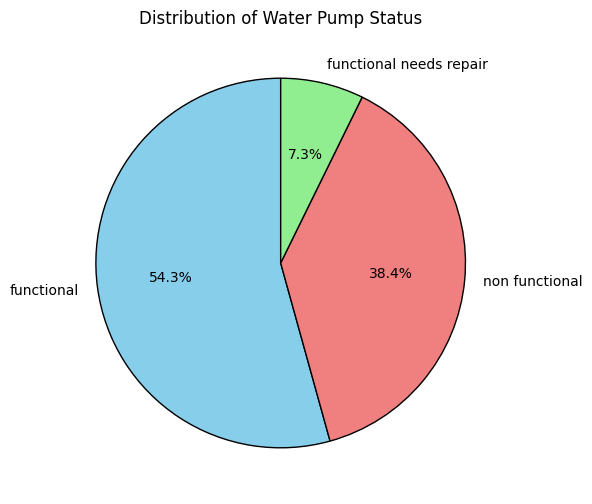

In [67]:
# Pie chart showing 'status_group' distribution 


status_counts = df_train['status_group'].value_counts()

plt.figure(figsize=(8, 6))
status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'], startangle=90, wedgeprops={'edgecolor': 'black'})


plt.title('Distribution of Water Pump Status')

# Display the plot
plt.ylabel('')  
plt.show()

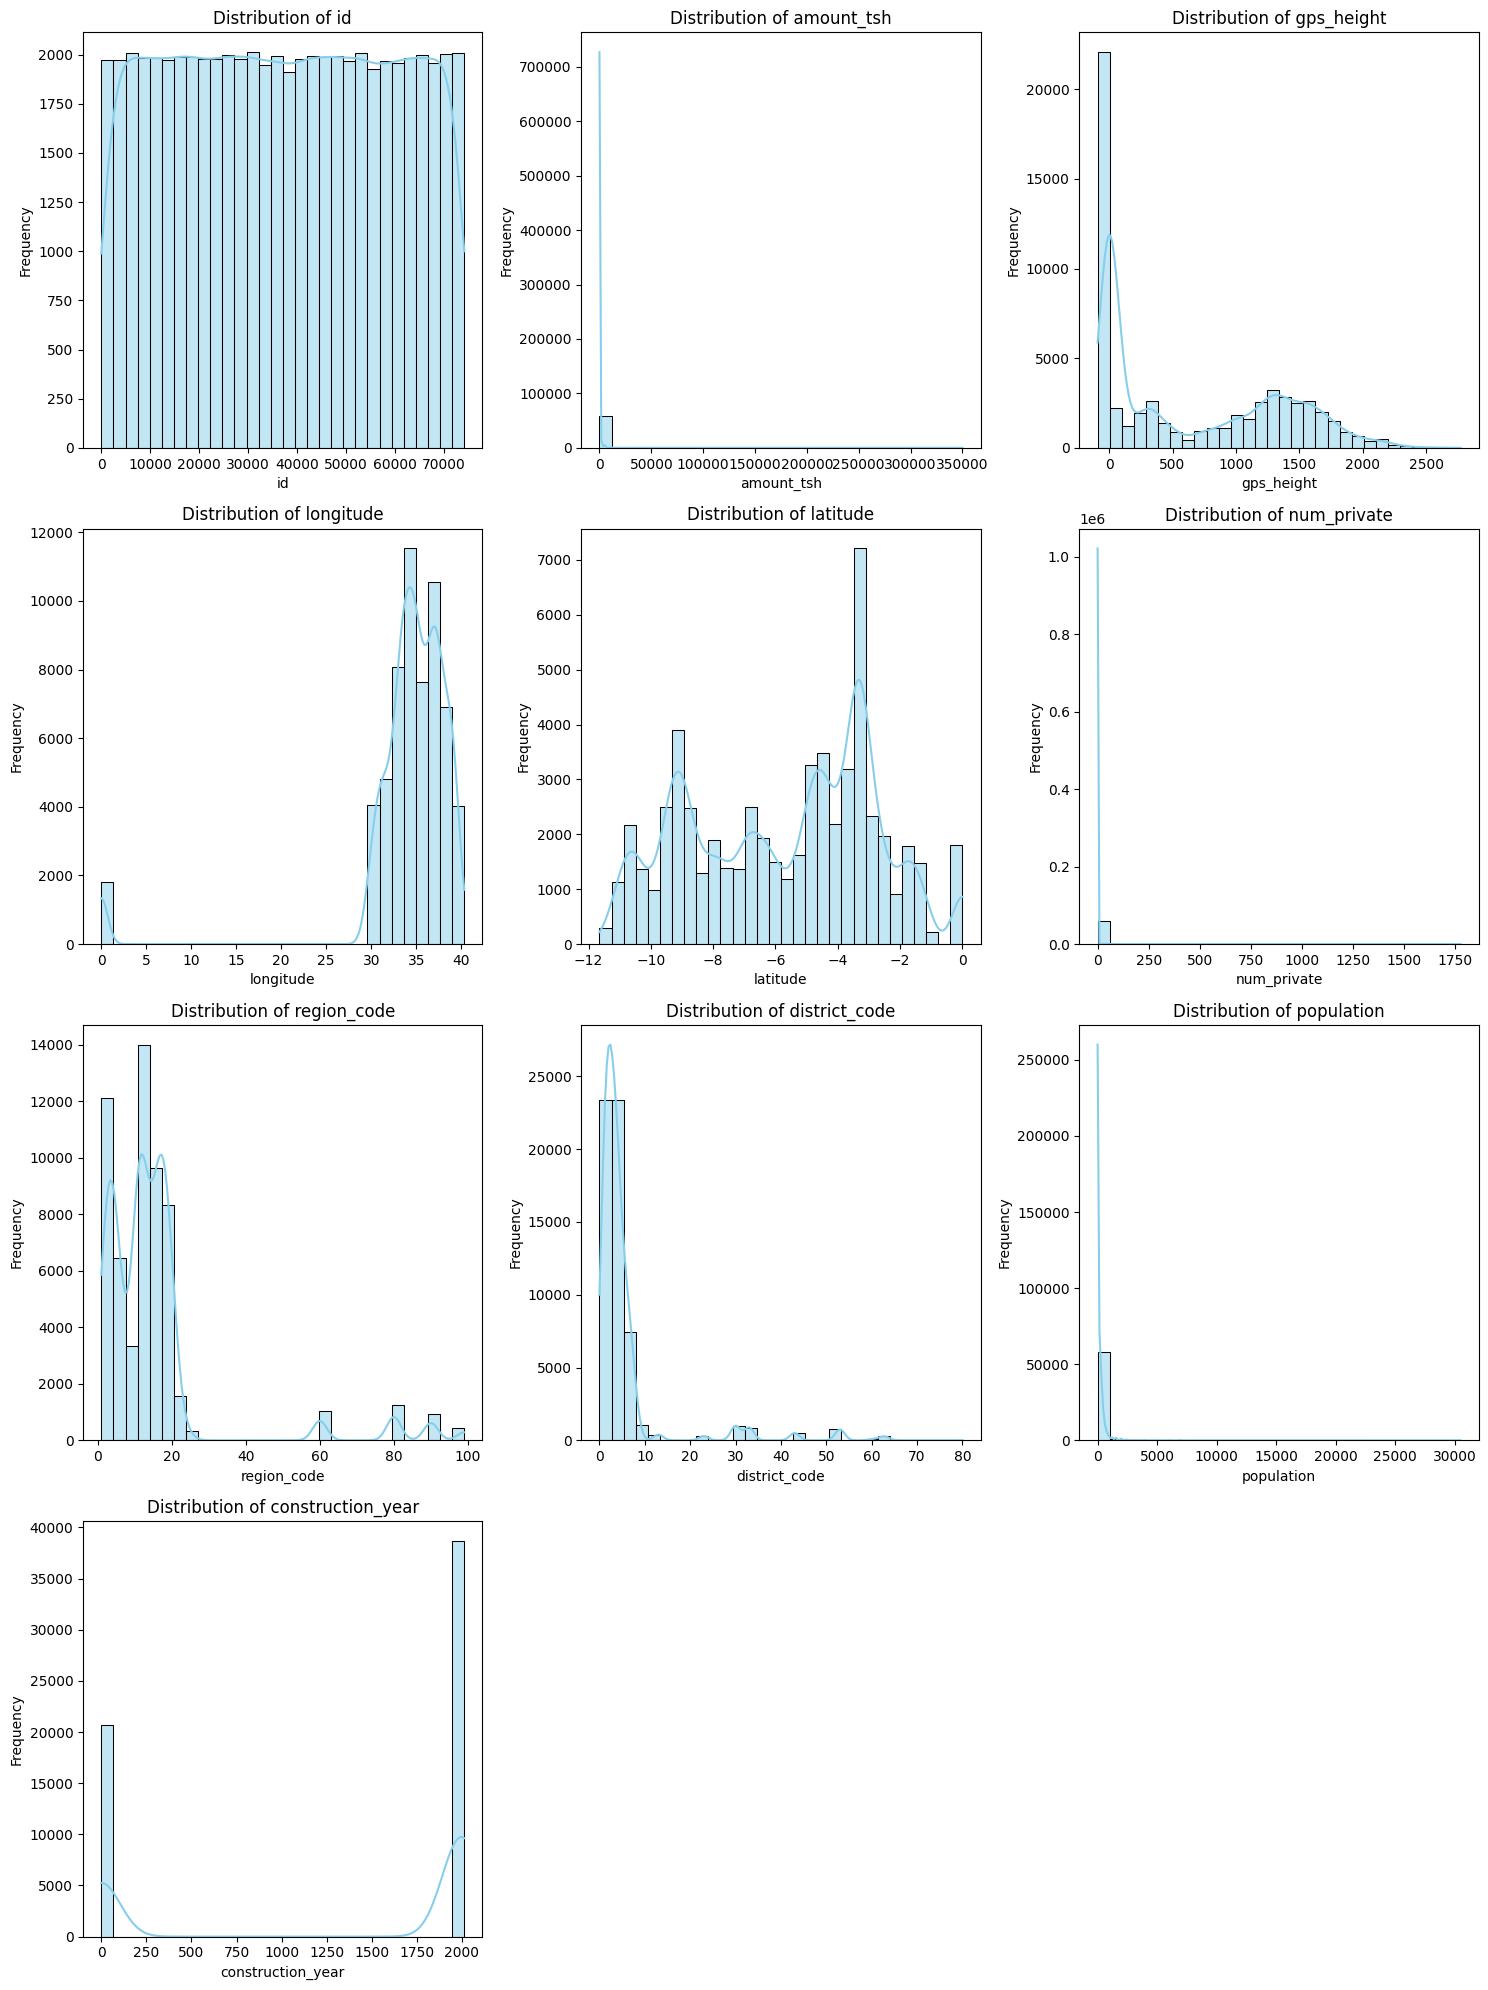

In [68]:
n_cols = 3

n_rows = int(np.ceil(len(numerical_columns) / n_cols))

# Create subplots with multiple rows and columns
plt.figure(figsize=(15, 5 * n_rows))  

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  
    sns.histplot(df_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()